['C:\\Users\\Sil\\Documents\\Ableton\\User Library\\Samples\\Bryson Tiller Drum Kit\\808s\\BTDK_808_1.wav',
 'C:\\Users\\Sil\\Documents\\Ableton\\User Library\\Samples\\Bryson Tiller Drum Kit\\808s\\BTDK_808_2.wav',
 'C:\\Users\\Sil\\Documents\\Ableton\\User Library\\Samples\\Bryson Tiller Drum Kit\\808s\\BTDK_808_3.wav',
 'C:\\Users\\Sil\\Documents\\Ableton\\User Library\\Samples\\Bryson Tiller Drum Kit\\808s\\BTDK_808_4.wav',
 'C:\\Users\\Sil\\Documents\\Ableton\\User Library\\Samples\\Bryson Tiller Drum Kit\\808s\\BTDK_808_5.wav',
 'C:\\Users\\Sil\\Documents\\Ableton\\User Library\\Samples\\Bryson Tiller Drum Kit\\Bassline Loops\\BTDK_Bassline_01.wav',
 'C:\\Users\\Sil\\Documents\\Ableton\\User Library\\Samples\\Bryson Tiller Drum Kit\\Bassline Loops\\BTDK_Bassline_02.wav',
 'C:\\Users\\Sil\\Documents\\Ableton\\User Library\\Samples\\Bryson Tiller Drum Kit\\Bassline Loops\\BTDK_Bassline_03.wav',
 'C:\\Users\\Sil\\Documents\\Ableton\\User Library\\Samples\\Bryson Tiller Drum Kit\\Bas

In [127]:
import librosa
import numpy
import glob
from sklearn.decomposition import PCA
from librosa.util import fix_length
from librosa.feature import spectral_centroid, spectral_flatness, spectral_contrast, tonnetz, spectral_bandwidth
import math

def extract_length_and_centroid(y, sr):
    fixed_size = 216
    
    centroid = spectral_centroid(y=y, sr=sr)
    centroid = fix_length(centroid, size=fixed_size)
    
    flatness = spectral_flatness(y=y)
    
    
    #tonnetz = librosa.feature.tonnetz(y=y, sr = sr)
    
    
    frequency = numpy.average(centroid)
    
    # pca = PCA(n_components=1)
    # pca.fit(centroid)
    
    length = librosa.get_duration(y=y, sr=sr)
    
    #return [math.log(frequency), math.log(length + (np.mean(flatness) * 10))]
    return [math.log(frequency), math.log(length)]

def extract_features(y, sr):
    fixed_size = 216

    centroid = spectral_centroid(y=y, sr=sr)
    centroid = fix_length(centroid, size=fixed_size)    
    
    S = np.abs(librosa.stft(y))
    contrast = spectral_contrast(S=S, sr=sr)    
    contrast = fix_length(contrast, size=fixed_size)
     
    flatness = spectral_flatness(y=y)
    flatness = fix_length(flatness, size=fixed_size)
        
    tonnetz = librosa.feature.tonnetz(y=y, sr = sr)
    tonnetz = fix_length(tonnetz, size=fixed_size)    
    
    spec_bw = spectral_bandwidth(y=y, sr=sr)
    spec_bw = fix_length(spec_bw, size=fixed_size)    
    
    #features = numpy.append(centroid, contrast, flatness, tonnetz, spec_bw)
    features = numpy.concatenate([centroid, contrast, flatness, tonnetz], axis=None)
    #features = numpy.append(features, flatness)
    #features = numpy.append(features, tonnetz)   
    #features = numpy.append(features, spec_bw)
        
    return features

def load_and_extract(path):
    y, sr = librosa.load(path)
    return extract_length_and_centroid(y, sr)

#files = glob.glob(r'C:\Users\Sil\Documents\Ableton\User Library\Samples\Bryson Tiller Drum Kit\**\*.wav')
#files = map(load_and_extract, files)
#files = list(files)

files = glob.glob(r'C:\Users\Sil\Documents\Ableton\User Library\Samples\Bryson Tiller Drum Kit\**\*.wav')
files = map(load_and_extract, files)
files = list(files)


In [106]:
files

[[5.390907132614383, 6.780273485631956],
 [5.3064028967630605, 6.0138387804746145],
 [5.198032859246881, 5.731929596139815],
 [4.345900856105672, 1.7785827814824822],
 [3.8539774374803555, 2.6761904980687423],
 [4.388326966197457, 18.119093005787306],
 [5.317795081962971, 21.097366415917737],
 [6.162788457218533, 11.436333432019564],
 [4.6774312589754325, 7.762086168763798],
 [7.077976723778269, 10.612818460649981],
 [5.182308138380365, 23.17983700507082],
 [5.916382788187836, 11.436586959095548],
 [7.3739170691418945, 11.804888682746563],
 [5.753359627916034, 11.631593575104896],
 [4.678914158974064, 15.504036282947602],
 [4.6504241698971365, 11.332199547052873],
 [5.8668670177867055, 7.475805582284775],
 [4.637820572640089, 9.074286732957638],
 [7.8912549048991005, 23.027649478844776],
 [7.426305473036266, 10.42483911795343],
 [7.230153142853147, 11.577003003711603],
 [4.6157232792097265, 14.145215420582527],
 [5.676906374825843, 13.745942937996189],
 [7.883407427046609, 23.024636583

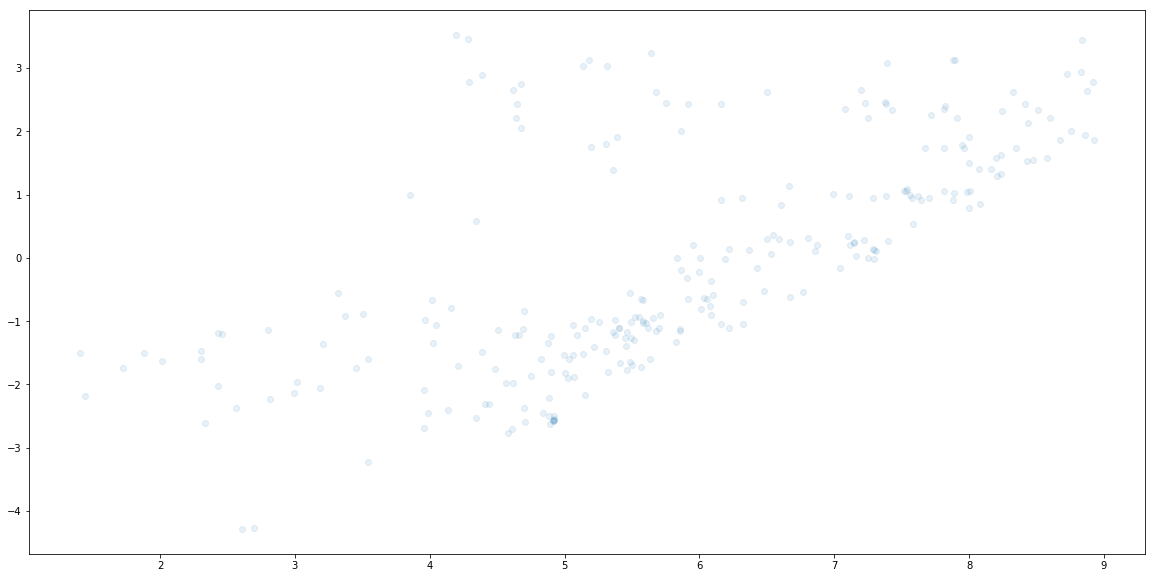

In [129]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#pca = PCA(n_components=2)
#pca.fit(files)

#features = pca.transform(files)
#plt.scatter(features[:, 0], features[:, 1], alpha=0.1)

plt.figure(figsize=(20,10))
files_np = numpy.array(files)
x = np.array(files_np[:,0])
y = np.array(files_np[:,1])
#y = np.clip(a=y, a_min=None, a_max=5)
plt.scatter(x, y, alpha=0.1)

plt.show()